#Importing libraries

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBRegressor


#The Exploratory Data Analysis

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ShAI Training/Task 7/train.csv')

In [ ]:
dataset.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


We notice the following:
*   the dataset has 11 columns and 43152 rows. 
*   three columns are categorical, and the rest are numerical.
*   there are no null values in any column.


In [ ]:
dataset.drop(columns=['Id',],inplace=True)

In [ ]:
num_attribs = dataset[['carat','depth','table','x','y','z']]
cat_attribs = dataset[['cut','color','clarity']]

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.797855,0.473594,0.2,0.40,0.70,1.04,5.01
depth,43152.0,61.747177,1.435454,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.458347,2.233904,43.0,56.00,57.00,59.00,95.00
price,43152.0,3929.491912,3985.527795,326.0,947.75,2401.00,5312.00,18823.00
x,43152.0,5.731568,1.121279,0.0,4.71,5.70,6.54,10.74
y,43152.0,5.735018,1.148809,0.0,4.72,5.71,6.54,58.90
z,43152.0,3.538568,0.708238,0.0,2.91,3.53,4.04,31.80


The minimum value of x, y, and z is zero, this indicates that there are erroneous values in the data which represent dimensionless or two-dimensional diamonds. So we need to filter out which ones are bad data points

In [ ]:
dataset[(dataset['x'] == 0.0) | (dataset['y'] == 0.0) | (dataset['z'] == 0.0)].count()

carat      17
cut        17
color      17
clarity    17
depth      17
table      17
price      17
x          17
y          17
z          17
dtype: int64

In [ ]:
dataset =  dataset.loc[(dataset[['x','y','z']]!=0).all(axis=1)]

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43135.0,0.797578,0.473325,0.20,0.40,0.70,1.04,5.01
depth,43135.0,61.747386,1.435091,43.00,61.00,61.80,62.50,79.00
table,43135.0,57.457925,2.233401,43.00,56.00,57.00,59.00,95.00
price,43135.0,3927.668691,3983.324154,326.00,947.00,2400.00,5311.00,18823.00
x,43135.0,5.731757,1.119336,3.73,4.71,5.70,6.54,10.74
y,43135.0,5.735070,1.147272,3.68,4.72,5.71,6.54,58.90
z,43135.0,3.539962,0.704884,1.07,2.91,3.53,4.04,31.80


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43135 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43135 non-null  float64
 1   cut      43135 non-null  object 
 2   color    43135 non-null  object 
 3   clarity  43135 non-null  object 
 4   depth    43135 non-null  float64
 5   table    43135 non-null  float64
 6   price    43135 non-null  int64  
 7   x        43135 non-null  float64
 8   y        43135 non-null  float64
 9   z        43135 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [ ]:
print(dataset['cut'].value_counts())
print(dataset['color'].value_counts())
print(dataset['clarity'].value_counts())


Ideal        17201
Premium      11103
Very Good     9657
Good          3878
Fair          1296
Name: cut, dtype: int64
G    9053
E    7832
F    7630
H    6645
D    5421
I    4264
J    2290
Name: color, dtype: int64
SI1     10426
VS2      9821
SI2      7424
VS1      6474
VVS2     4041
VVS1     2904
IF       1442
I1        603
Name: clarity, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f995ac66b90>,
      dtype=object)

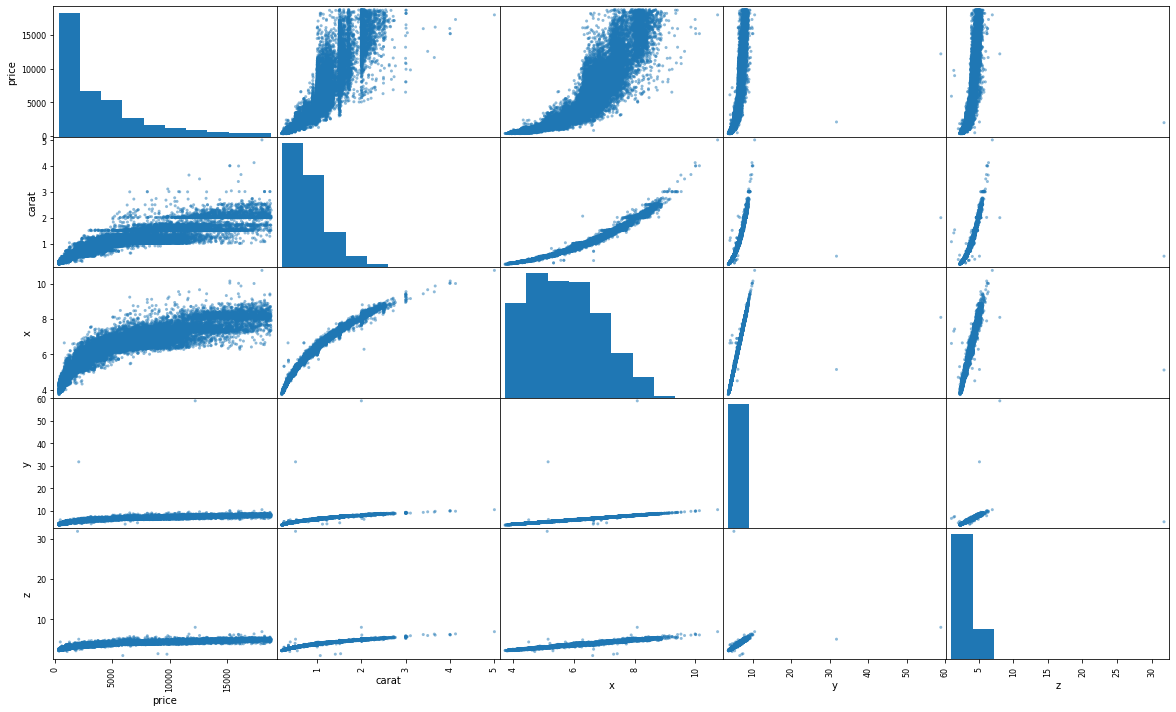

In [ ]:
scatter_matrix(dataset[['price','carat','x','y','z']], figsize=(20, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f995aca1490>,
      dtype=object)

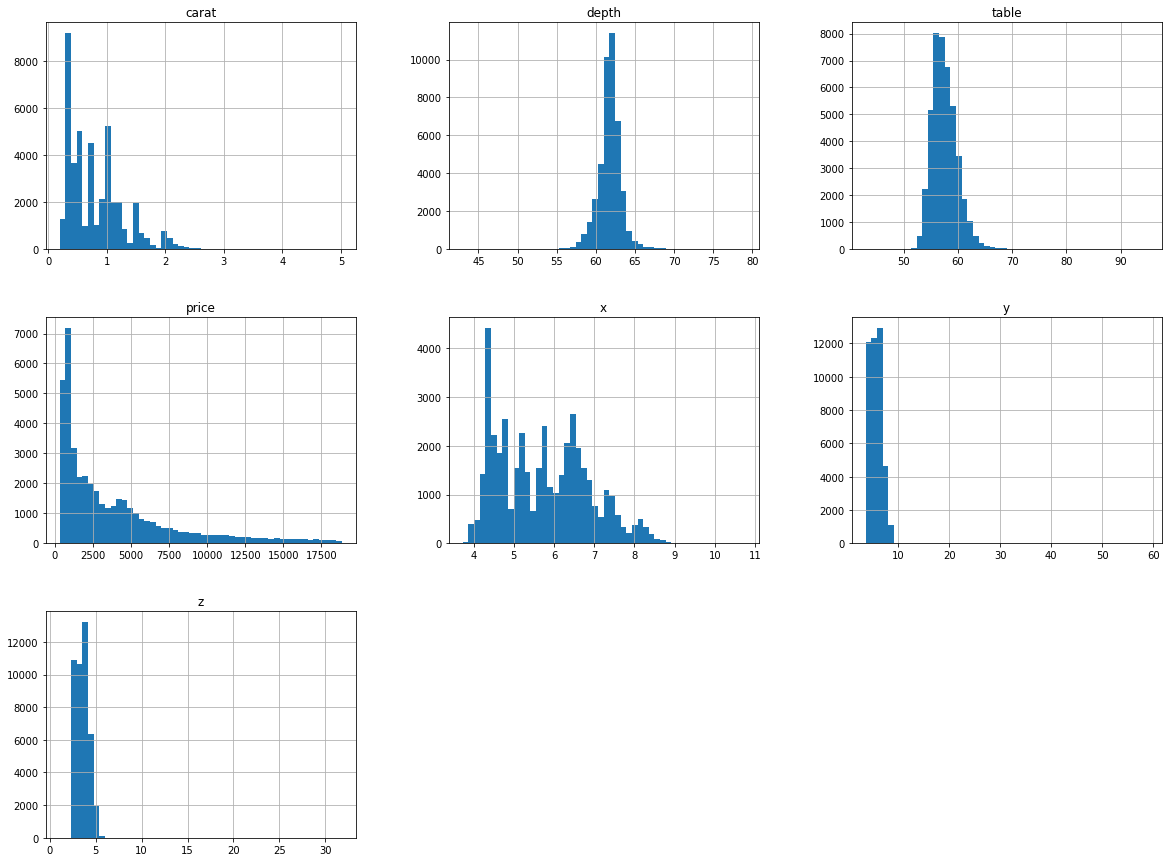

In [ ]:
dataset.hist(bins=50, figsize=(20,15))

This revels the distribution of each property. As expected, we see that the data is not normally distributed. After all, how can you expect a 1 carat diamond to be priced just at twice the price of a half-carat given all properties remain the same, while a 1 carat diamond looks much bigger to the eye when in a ring or earrings for that matter than a half carat one.

Let's look for any outliers in the columns.

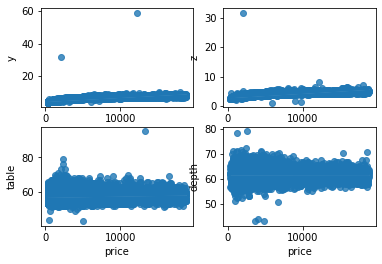

In [ ]:
fig, axs = plt.subplots(2, 2)
sb.set(rc = {'figure.figsize':(140,20)})
sb.regplot(x="price", y="y", data=dataset, fit_reg=True,ax= axs[0, 0])
sb.regplot(x="price", y="z", data=dataset, fit_reg=True,ax= axs[0, 1])
sb.regplot(x="price", y="table", data=dataset, fit_reg=True,ax= axs[1, 0]) 
sb.regplot(x="price", y="depth", data=dataset, fit_reg=True,ax= axs[1, 1])


Some features with a data point that are far from the rest of the dataset will affect the outcome of our regression model, such as:

*  y and z have dimensional outliers in our dataset that need to be eliminated.
*  The depth should be capped but we have to look at the regression line to be sure.
*  The table presented must also be capped.

In [ ]:
dataset = dataset[(dataset["depth"]<75)&(dataset["depth"]>45)]
dataset = dataset[(dataset["table"]<80)&(dataset["table"]>40)]
dataset = dataset[(dataset["x"]<30)]
dataset = dataset[(dataset["y"]<30)]
dataset = dataset[(dataset["z"]<30)&(dataset["z"]>2)]
dataset.shape

(43123, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9957e9b850>,
      dtype=object)

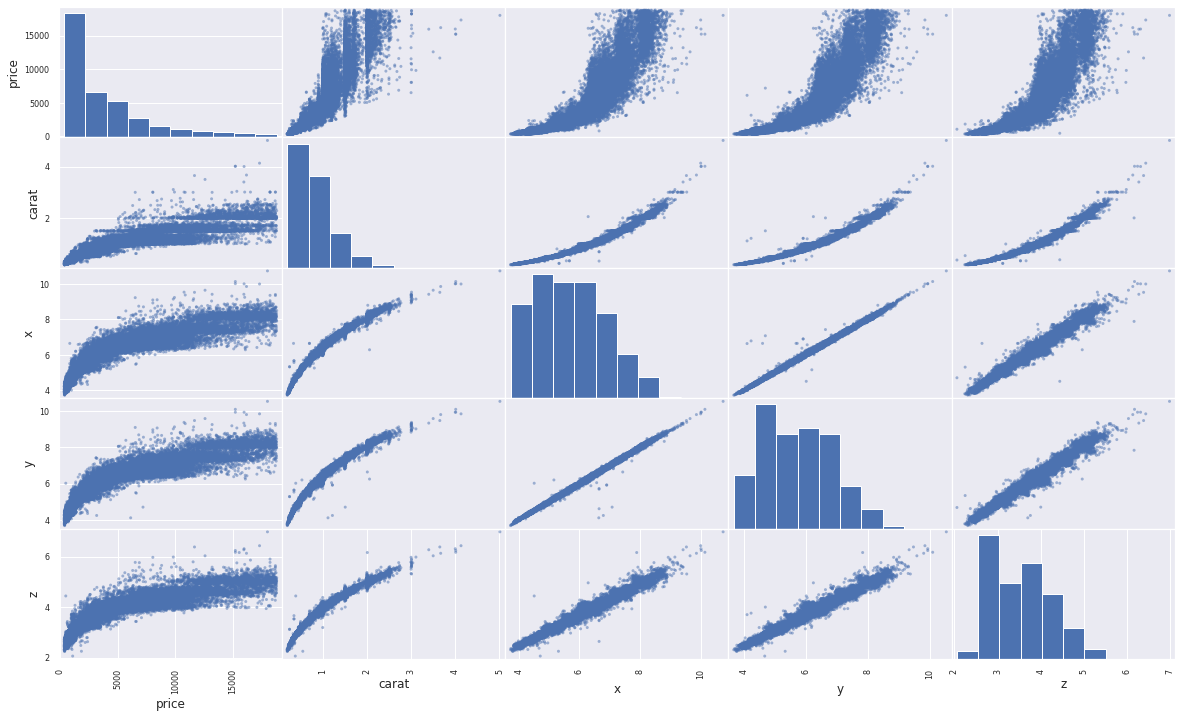

In [ ]:
scatter_matrix(dataset[['price','carat','x','y','z']], figsize=(20, 12))

we notice the high correlation between carat and price, it's almost linear.
Let's further investigate.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


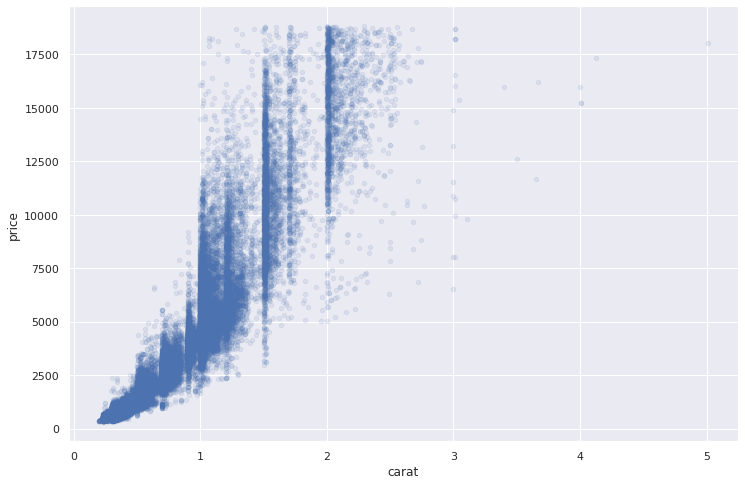

In [ ]:
dataset.plot(kind="scatter", x="carat", y="price", alpha=0.1, figsize=(12,8))

There are some vertical lines in the data which isn't good, it's probably due to a certain capping in the carat data, or maybe those lines represent a more common value, or whatever the reason might be, we may want to try removing the corresponding districts to prevent the algorithms
from learning to reproduce these data quirks, but that would shorten the data so much.

now we will try to introduce a new feature which is the size of a diamond if we assume it's a cube so it will be length x width x depth.

In [ ]:
dataset['size'] = dataset['x'] * dataset['y'] * dataset['z']

In [ ]:
dataset.drop(columns=['x','y','z'], inplace=True)

Now we have to convert all categorical columns to numerical columns using labelencoder and scale the numerical columns.

In [ ]:
cat_columns = ['cut','color','clarity']
num_columns = ['carat','depth','table','size']

In [ ]:
label_encoder = LabelEncoder()
for col in cat_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [ ]:
standard_scaler = StandardScaler()
for col in num_columns:
  S = np.asarray(dataset[col])
  S = S.reshape(-1,1)
  dataset[col] = standard_scaler.fit_transform(S)

In [ ]:
corr_matrix = dataset.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
size       0.923887
carat      0.921868
color      0.171554
table      0.128278
cut        0.042462
depth     -0.012773
clarity   -0.069238
Name: price, dtype: float64

the new feature size also shows a strong correlation with the target column.
while the depth, cut and table columns show a weak correlation.

In [ ]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.554677,2,5,3,0.036513,-0.205500,4270,6.57,6.60,4.07
1,1.505492,3,3,7,-0.596294,0.243996,15164,7.38,7.42,4.51
2,-1.008885,2,2,5,-0.315046,-0.654996,828,4.43,4.41,2.71
3,-0.565171,2,3,5,-0.385358,-0.654996,1577,5.19,5.22,3.19
4,-0.205975,3,4,7,-0.525982,-0.205500,2596,5.76,5.72,3.50


In [ ]:
dataset_features = dataset.drop(columns=['price'])
dataset_labels = dataset['price']

In [ ]:
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Standard deviation:", scores.std())

In [ ]:
def evaluate(model, features, labels):
  predictions = model.predict(features)
  mse = mean_squared_error(labels, predictions)
  rmse = np.sqrt(mse)
  return rmse

#Finding The Right Model.

In [ ]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(dataset_features,dataset_labels)
evaluate(reg_all, dataset_features, dataset_labels)

1366.1169723182556

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(dataset_features,dataset_labels)
evaluate(forest_reg, dataset_features, dataset_labels)

207.0707787212169

In [ ]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(dataset_features, dataset_labels)
evaluate(gb_reg, dataset_features, dataset_labels)

654.32593570079

In [ ]:
xgb_reg = XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(dataset_features,dataset_labels)
evaluate(xgb_reg, dataset_features, dataset_labels)

654.1828601469734

Gradient Boosting and Random forest seem promising so let's start tunning the parameters for them

In [ ]:
param_distribs = {
        'n_estimators': np.random.randint(150, 400, 10),
        'max_features': np.random.randint(1, 8, 10),
        'max_depth': np.random.randint(8, 40, 10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(dataset_features, dataset_labels)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=82,
                                                   random_state=42),
                   param_distributions={'max_depth': array([11, 36, 26, 38, 26, 19, 14, 39, 19, 36]),
                                        'max_features': array([7, 4, 5, 6, 7, 5, 5, 4, 3, 7]),
                                        'n_estimators': array([394, 361, 192, 183, 163, 236, 173, 308, 376, 285])},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
evaluate(rnd_search.best_estimator_, dataset_features, dataset_labels)

200.2789341156615

In [ ]:
scores = cross_val_score(rnd_search.best_estimator_, dataset_features, dataset_labels,
                    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [586.30609505 537.62303912 560.87326484 523.45286295 568.8555296
 548.83166462 547.33458831 534.08717621 512.63290111 557.35278479]
Mean: 547.734990661416
Standard deviation: 20.76193465944861


In [ ]:
param_distribs = {
        'n_estimators': np.random.randint(100, 400, 10),
        'max_depth': np.random.randint(8, 30, 10),
    }

gb_reg = GradientBoostingRegressor()
xrnd_search = RandomizedSearchCV(gb_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
xrnd_search.fit(dataset_features, dataset_labels)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': array([26, 27,  8, 21, 23, 21, 17, 22, 10, 14]),
                                        'n_estimators': array([277, 372, 328, 349, 261, 250, 186, 369, 306, 385])},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
evaluate(xrnd_search.best_estimator_, dataset_features, dataset_labels)

263.3429429191714

In [ ]:
xrnd_search.best_estimator_

GradientBoostingRegressor(max_depth=8, n_estimators=328)

GradientBoostingRegressor(max_depth=8, n_estimators=280)


In [ ]:
scores = cross_val_score(xrnd_search.best_estimator_, dataset_features, dataset_labels,
                    scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-scores)
display_scores(xgb_rmse_scores)

Scores: [570.41267684 520.66693433 564.1327116  527.43218417 553.0472132
 524.80181546 534.8249119  516.2411643  516.84177252 552.00815365]
Mean: 538.0409537960628
Standard deviation: 19.166729337090683


the dradient boosting regressor seems better than random forest regressor.

#Generating The Submission File

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ShAI Training/Task 7/test.csv')

In [ ]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test_Ids = test['Id']
test['size'] = test['x'] * test['y'] * test['z']
test.drop(columns=['Id','x','y','z'],inplace=True)

for col in cat_columns:
    test[col] = label_encoder.fit_transform(test[col])

standard_scaler = StandardScaler()
for col in num_columns:
  S = np.asarray(test[col])
  S = S.reshape(-1,1)
  test[col] = standard_scaler.fit_transform(S)

In [ ]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(test)

In [ ]:
submission = pd.DataFrame({'id':test_Ids,'price':final_predictions})

In [ ]:
submission

,id,price
0,1,912.257666
1,2,2905.865907
2,3,814.524082
3,4,2834.433796
4,5,1075.244173
...,...,...
10783,10784,1769.066322
10784,10785,6651.482423
10785,10786,4397.813723
10786,10787,4829.147314


In [ ]:
submission.to_csv('submission.csv',index=False)